In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# display settings
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.float_format', lambda x: '%.4f' % x)
np.set_printoptions(precision=2, suppress=True)

In [40]:
np.random.seed(2022)
jNum = np.random.randint(1, 300, 500)
np.random.seed(2022)
mNum = np.random.randint(1, 20, 500)
# print(jNum, mNum, jNum / mNum)
(jNum / mNum <= 50).sum()

433

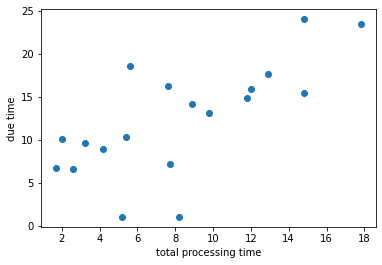

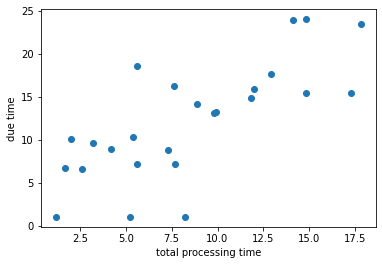

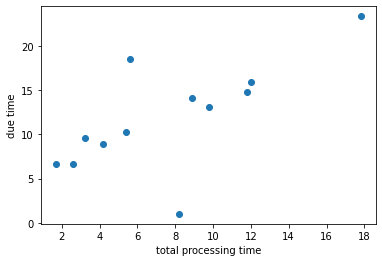

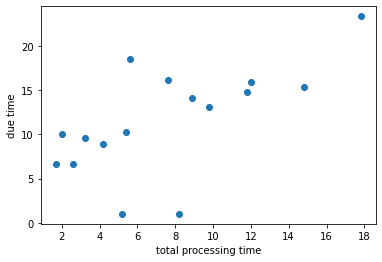

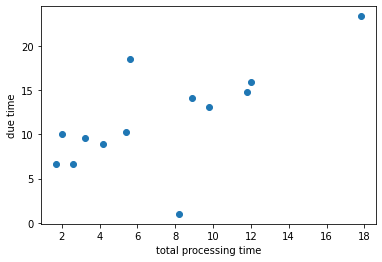

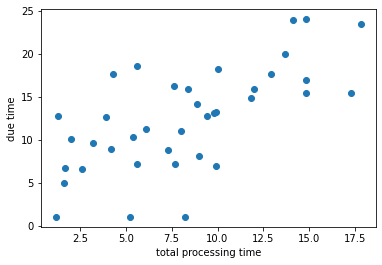

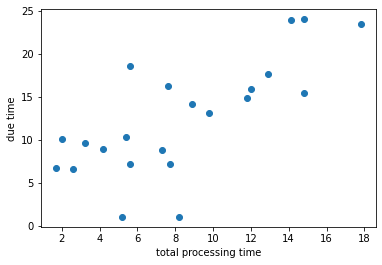

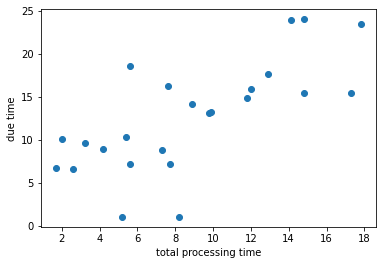

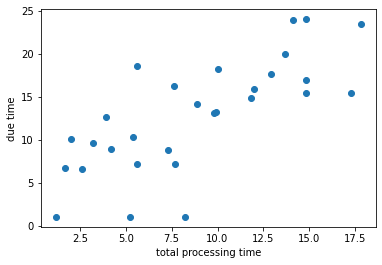

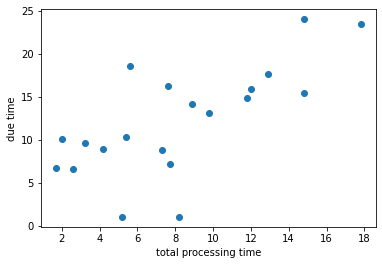

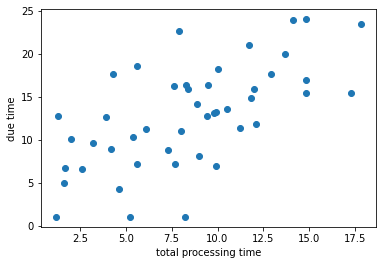

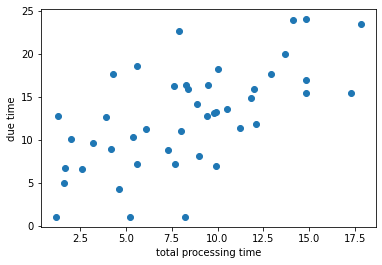

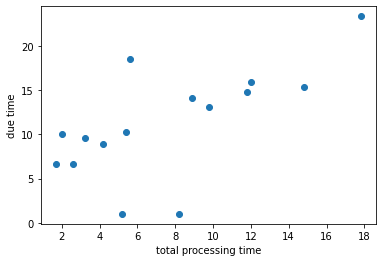

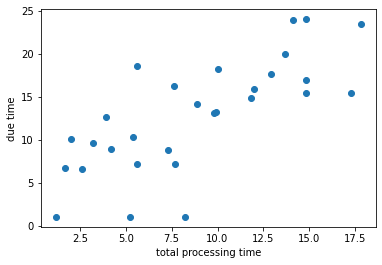

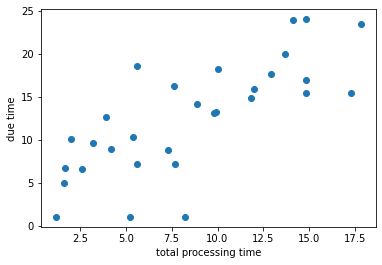

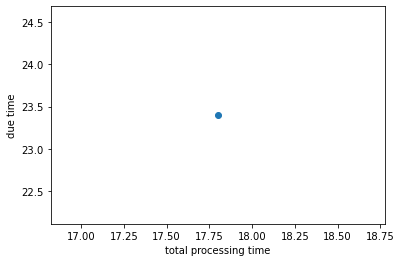

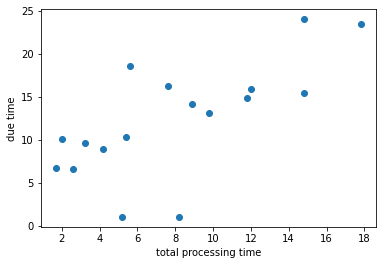

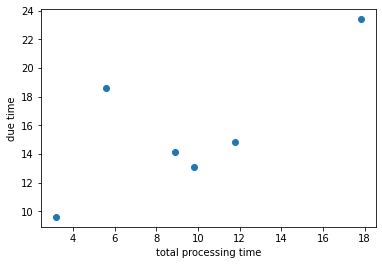

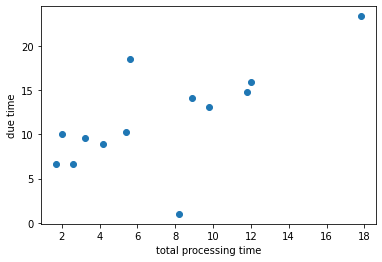

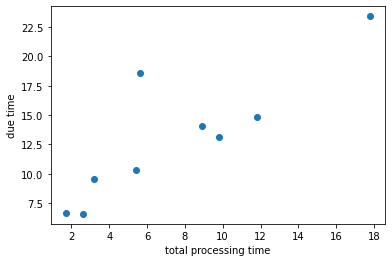

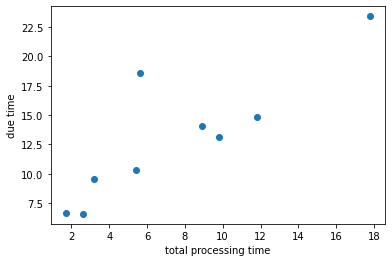

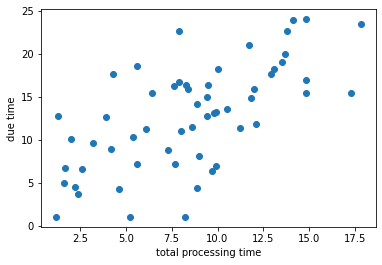

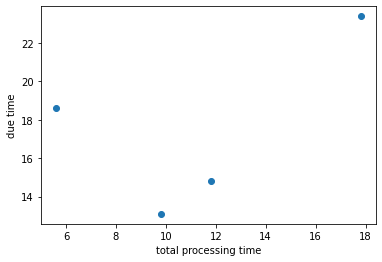

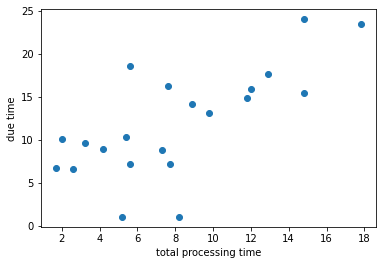

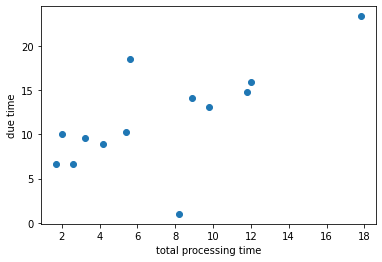

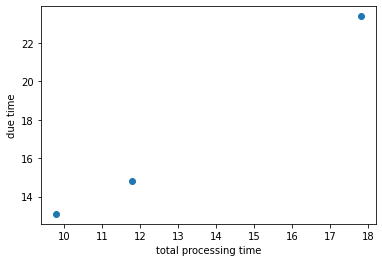

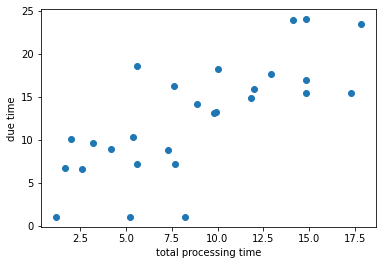

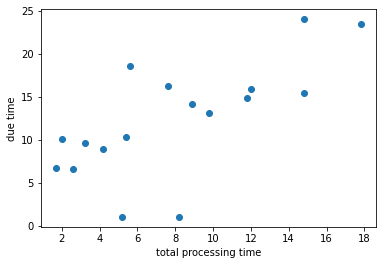

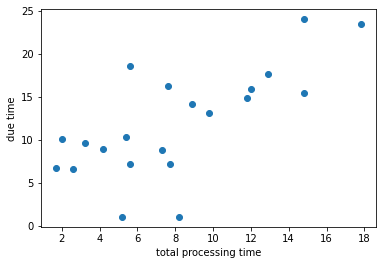

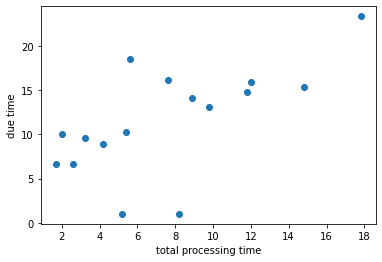

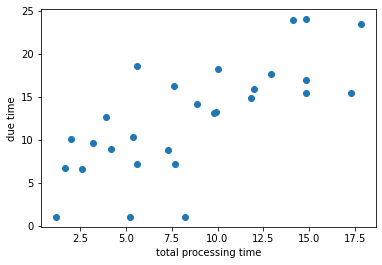

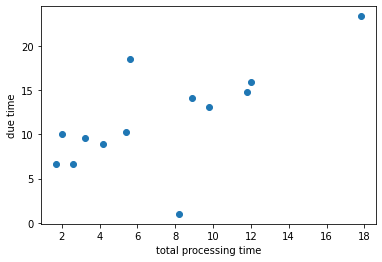

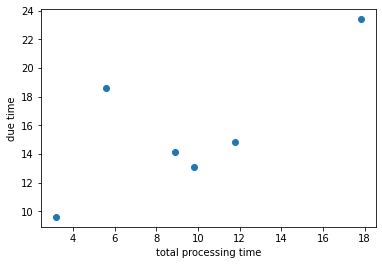

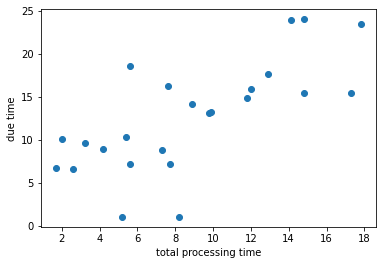

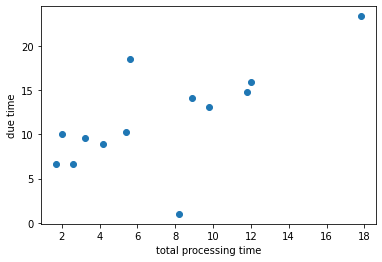

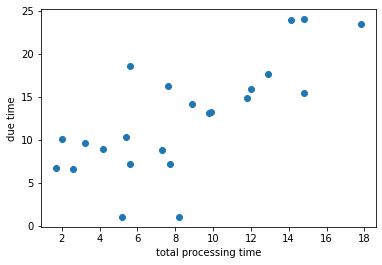

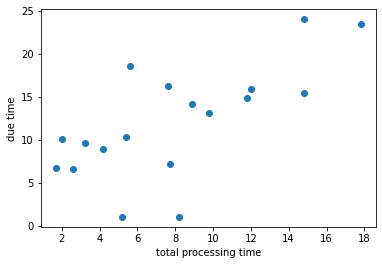

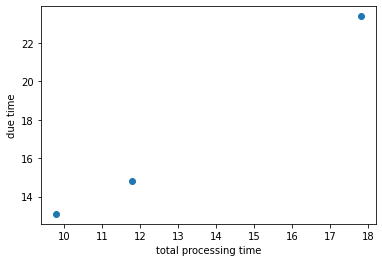

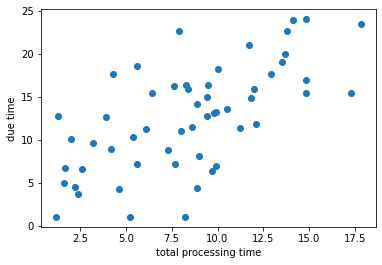

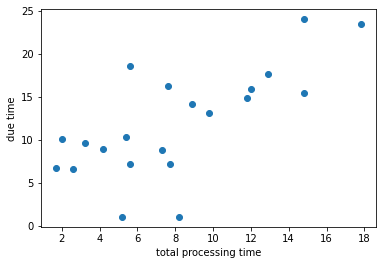

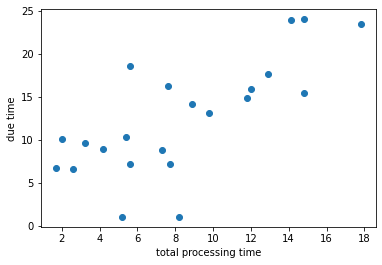

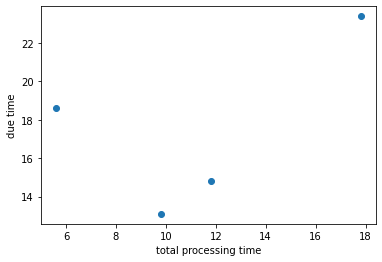

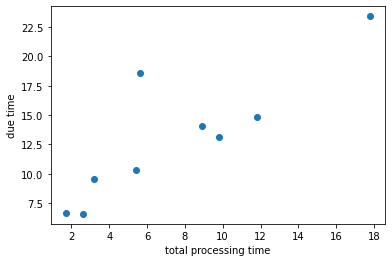

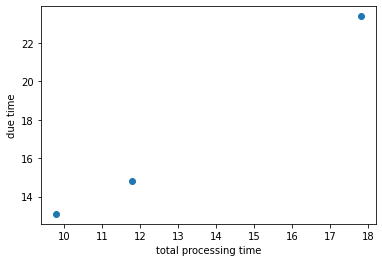

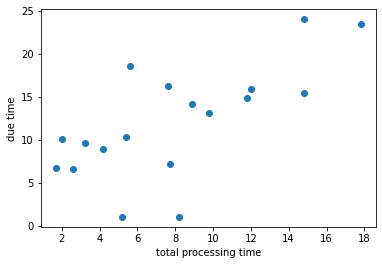

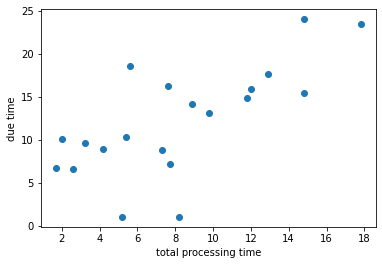

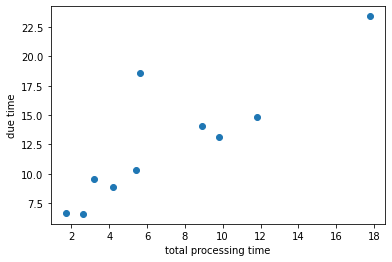

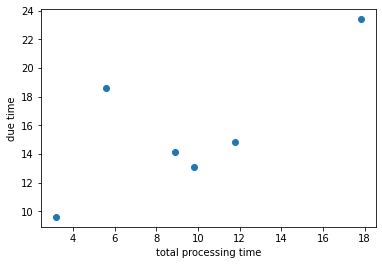

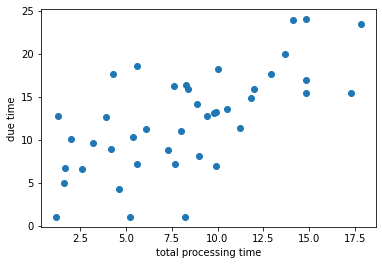

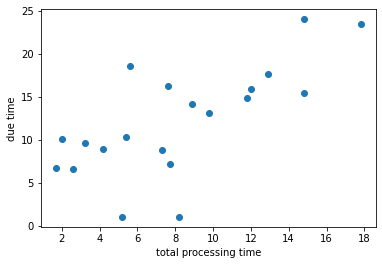

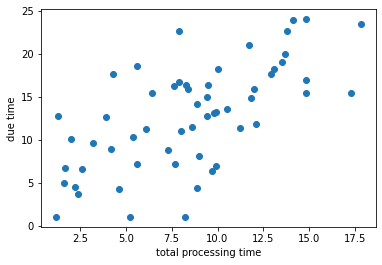

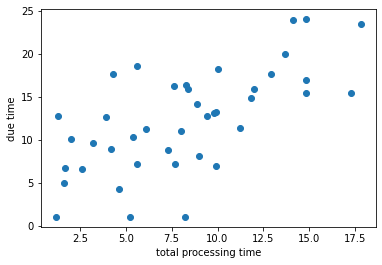

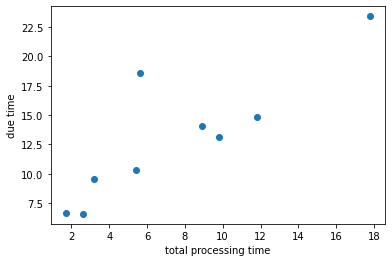

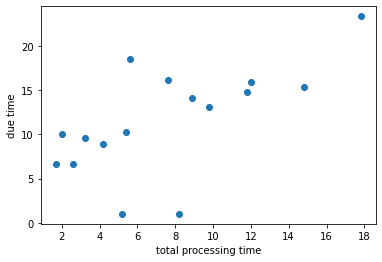

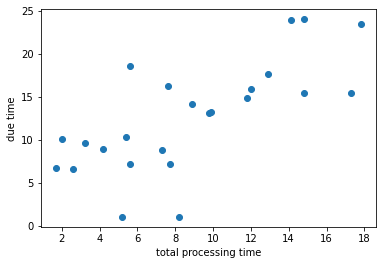

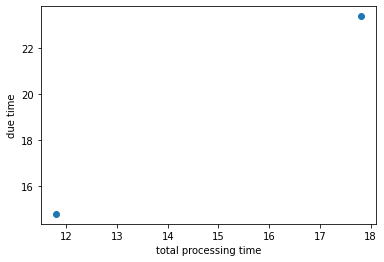

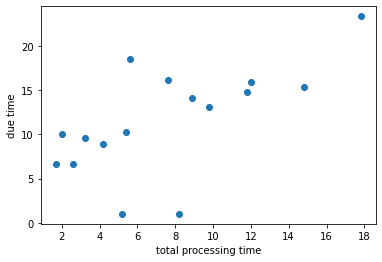

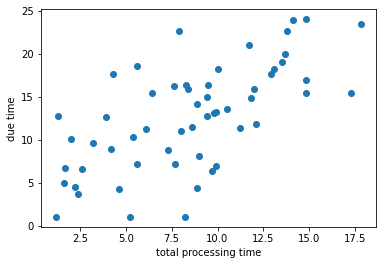

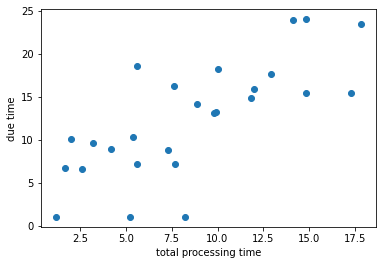

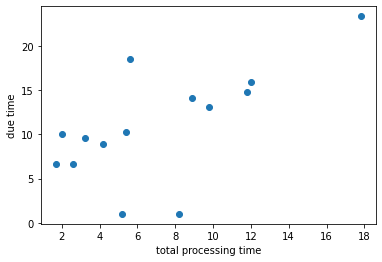

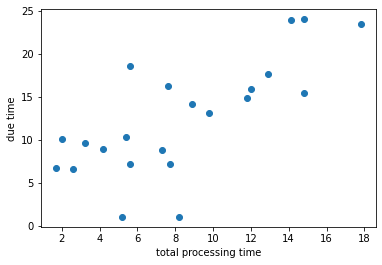

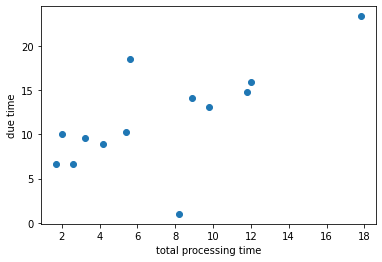

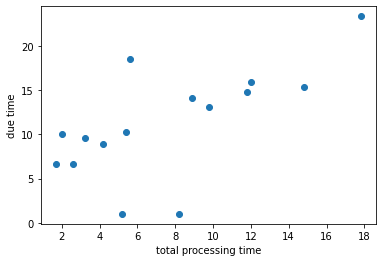

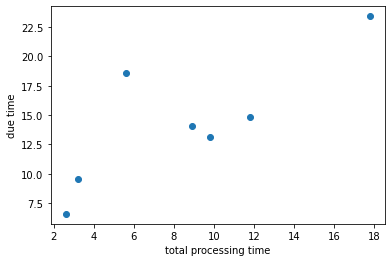

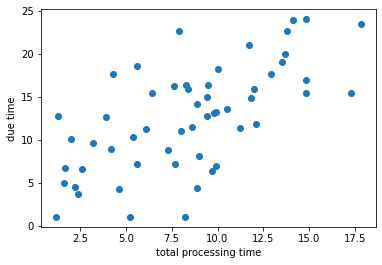

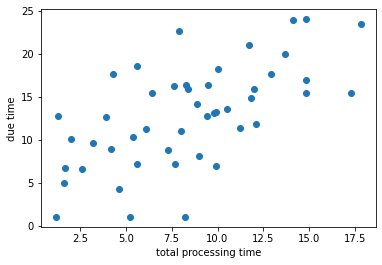

66


In [46]:
processing_time_1 = []
processing_time_2 = []
due_time = []
stage1_machines = []
stage2_machines = []
testcase_count = 0

for i in range(len(jNum)):
    
    if (jNum[i] / mNum[i] > 50):
        continue
    
    np.random.seed(2022)
    pt1 = np.random.randint(1, 100, jNum[i]) / 10
    
    np.random.seed(2022)
    pt2 = (np.random.randint(0, 140, jNum[i])) / 10 - 4
    
    # make nan probability larger
    pt2[pt2 < 0] = 0
    
    # positive correlation between processing time and due time + error
    # try to lower the possibility of doomed-to-be tardy jobs
    np.random.seed(2022)
    d1 = (pt1 + pt2) * 1.2 + np.random.randn(jNum[i]) * 5 + 2
    d1 = d1.round(decimals=1)
    
    # upper and lower bound
    d1[d1 < 1] = 1
    d1[d1 > 24] = 24
    
    # overworked
    if (sum(pt1 + pt2) > 3 * mNum[i] * 24):
        continue
    
    # too many doomed tardy jobs
    if (sum(pt1 + pt2 > d1) > jNum[i] * 0.2):
        continue
    
#     print("d1", d1)
#     print("job num:", t1[i])
#     print("less than:", sum(pt1 + pt2 > d1))
#     print("operation time:", m1[i] * 24)
#     print("due time:", sum(d1))
#     print("process time:", sum(pt1 + pt2))
    
    plt.scatter(pt1 + pt2, d1)
    plt.xlabel("total processing time")
    plt.ylabel("due time");
    plt.show()
    
    processing_time_1.append(pt1)
    processing_time_2.append(pt2)
    due_time.append(d1)
    
    # machine
    st1_restrict = []
    st2_restrict = []
    for j in range(jNum[i]):
        
        np.random.seed(j)
        # use set to make sure numbers are unique / faster "in" operation latter
        tmp1 = set(np.random.randint(1, jNum[i], int(jNum[i] / 4)))
        st1_restrict.append(tmp1)
        
        np.random.seed(j)
        tmp2 = set(np.random.randint(1, jNum[i], int(jNum[i] / 2)))
        st2_restrict.append(tmp2)
#     print("st1", st1_restrict)
#     print("st2", st2_restrict)
    
    st1_machines = []
    for j in range(jNum[i]):
        st1_machines_tmp = ""
        for m in range(1, mNum[i] + 1):
            if (m not in st1_restrict[j]):
                st1_machines_tmp += str(m) + ","
        st1_machines_tmp = st1_machines_tmp.rstrip(",")
        st1_machines.append(st1_machines_tmp)
#     print("st1 machines", st1_machines)
    
    
    st2_machines = []
    for j in range(jNum[i]):
        st2_machines_tmp = ""
        for m in range(1, mNum[i] + 1):
            if (m not in st2_restrict[j]):
                st2_machines_tmp += str(m) + ","
        st2_machines_tmp = st2_machines_tmp.rstrip(",")
        st2_machines.append(st2_machines_tmp)
#     print("st2 machines", st2_machines)
    
    stage1_machines.append(st1_machines)
    stage2_machines.append(st2_machines)
    testcase_count += 1
    
print(testcase_count)

In [47]:
if os.getcwd() != '/Users/wangyanpu/Desktop/台灣大學/大三下/作業研究/case/Case2/testcase':
    os.chdir('/Users/wangyanpu/Desktop/台灣大學/大三下/作業研究/case/Case2/testcase')
if not os.path.exists('testcases-medium'):
    os.makedirs('testcases-medium')

os.chdir("testcases-medium")
os.getcwd()

'/Users/wangyanpu/Desktop/台灣大學/大三下/作業研究/case/Case2/testcase/testcases-medium'

In [48]:
for i in range(testcase_count):
    df = pd.DataFrame(due_time[i], columns=["Due Time"])
    df["Stage-1 Processing Time"] = processing_time_1[i]
    df["Stage-2 Processing Time"] = processing_time_2[i]
    df["Stage-1 Machines"] = stage1_machines[i]
    df["Stage-2 Machines"] = stage2_machines[i]
    df.index = np.arange(1, len(df) + 1)
    df.index.names = ['Job ID']
    
    
    no_stage2 = (df["Stage-2 Processing Time"] == 0)
    df.loc[no_stage2, "Stage-2 Machines"] = np.nan  
    display(df)
    
    df.to_csv("instance " + str(i + 1) + ".csv")

print("generated %d cases" %(testcase_count))

,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17,18,19","2,3,6,9,11,12,14,15,17,18,19"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15,16,17,18,19","2,3,4,5,7,8,11,14,15,17,18,19"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15,17,18,19","1,2,4,5,6,7,10,11,13,15,17,18,19"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17,18,19",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17,18,19",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14,17,18,19","1,2,3,6,11,12,13,14,18,19"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,14,15,16,17,18,19","1,3,5,6,7,8,9,12,13,15,18,19"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15,17,18,19",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,9,11,12,13,14,15,16,17,19",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17","2,3,6,7,9,11,12,14,15,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17","3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16,17","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,9,10,11,12,13,14,15,17",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12","2,3,5,7,9,11,12"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,12","2,3,4,5,7,8,11,12"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12","1,2,4,5,6,10,11,12"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8,12",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12","2,3,5,6,8,11,12"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12","1,2,3,6,7,8,9,12"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,10,11,12",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12,14,15,16,17","2,3,5,7,9,11,14,15,16,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15,16,17","2,3,4,5,7,8,11,14,15,16,17"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12,13,15,16,17","1,2,4,5,6,8,10,11,13,15,16,17"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,16,17","2,3,5,6,8,11,12,13,16,17"
7,6.6000,2.5000,0.1000,"1,2,3,6,7,8,9,12,13,14,15,16,17","2,3,6,7,8,9,12,13,15,16,17"
8,6.7000,1.7000,0.0000,"1,2,3,6,8,9,11,12,13,14,15,16,17",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12,13","2,3,5,7,9,10,11,13"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,13","1,2,3,4,5,7,8,11,13"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12,13","1,2,4,5,6,8,10,11,13"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8,12,13",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13","2,3,5,6,8,11,12,13"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13","1,2,3,6,7,8,9,12,13"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12,13",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,10,11,12,13",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11,12","3,5,6,8,11,12"
2,14.8000,4.6000,7.2000,"3,4,5,7,8,11","3,4,5,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11","1,2,3,7,10,11"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12",NaN
5,14.1000,8.9000,0.0000,"3,5,7,8,11,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,12",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12","2,3,6,9,11,12"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11","3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11","1,2,4,5,6,7,10,11"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12","1,2,3,6,11,12"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12","1,3,5,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,9,11,12",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17,18,19","2,3,6,7,9,11,12,14,15,17,18"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17,18,19","3,4,5,7,8,11,14,15,18,19"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17,18,19","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17,18,19",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17,18",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14,18,19","1,2,3,6,11,12,13,14,18,19"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16,17,18,19","1,3,5,6,7,8,9,13,15,18,19"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15,17,18,19",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17,19",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10","2,3,6,7,9"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8","3,4,5,7"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10","1,2,4,5,6,7,10"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9","1,3,5,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,9,10",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17,18,19","2,3,6,9,11,12,14,15,17,18"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17,18,19","2,3,4,5,7,8,11,14,15,18,19"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17,18,19","1,2,4,5,6,7,10,11,13,15,17,18"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17,18,19",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17,18,19",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14,18,19","1,2,3,6,11,12,13,14,18,19"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16,17,18,19","1,3,5,6,7,8,9,13,15,18,19"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,17,18,19",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17,19",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11,12,13,14","3,5,6,8,9,11,12"
2,14.8000,4.6000,7.2000,"3,4,5,7,8,11,14","3,4,5,11,14"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11,13,14","1,2,3,6,7,10,11,13,14"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12,13,14","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9,13,14","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12,13,14",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,12,13,14",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11,12,13","3,5,6,8,9,11,12"
2,14.8000,4.6000,7.2000,"3,4,5,7,8,11","3,4,5,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11,13","1,2,3,6,7,10,11,13"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11,12,13",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12,13","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9,13","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12,13",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,12,13",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,7,8,9,10,11,12,14,15,16,17","2,3,5,7,9,10,11,14,15,16,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,9,10,11,14,15,16,17","1,2,3,4,5,7,8,11,14,15,16,17"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15,16,17","1,2,4,5,6,8,10,11,13,15,16,17"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13,14,15,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,15,16,17","2,3,5,6,8,11,12,13,15,16,17"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,14,15,16,17","1,2,3,6,7,8,9,12,13,15,16,17"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12,13,14,15,16,17",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,10,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8","2,3,6,7"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8","3,4,5,7"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8","1,2,4,5,6,7"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8","1,3,5,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17","2,3,6,9,11,12,14,15,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17","3,4,5,7,11,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,11,12,13,14","1,2,3,6,11,12,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,17","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,9,10,11,12,13,14,15,17",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,5,6,7,8,9,10,11,12,13","1,2,3,4,5,6,7,8,9,10,11,12,13"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,7,8,9,10,11,12,14,15,17","2,3,5,7,9,10,11,14,15,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15,16,17","1,2,3,4,5,7,8,11,14,15,17"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15,17","1,2,4,5,6,8,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,7,8,9,10,11,12,13,17","2,3,5,6,8,9,11,12,13,17"
7,6.6000,2.5000,0.1000,"1,2,3,6,7,8,9,12,13,14,15,16,17","1,2,3,6,7,8,9,12,13,15,17"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12,13,14,15,17",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4","2,3"
2,14.8000,4.6000,7.2000,"1,2,3","2,3"
3,13.1000,5.0000,4.8000,"2,3,4","2,3"
4,18.6000,5.6000,0.0000,"1,2,4",NaN
5,14.1000,8.9000,0.0000,"1,2,4",NaN
6,9.6000,1.9000,1.3000,"1,2,3",3


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7","2,3,5,7"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7","1,2,3,4,5,7"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6","1,2,4,5,6"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6","2,3,5,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7","1,2,3,6,7"
8,6.7000,1.7000,0.0000,"1,2,3,4,6",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,9","2,3,4,7,9"
2,14.8000,4.6000,7.2000,"1,2,3,5,7,8,9","2,3,7,8,9"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,9","2,3,4,5,7,9"
4,18.6000,5.6000,0.0000,"2,4,5,6,7,8,9",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,8,9",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9","1,2,3,5,9"
7,6.6000,2.5000,0.1000,"1,4,5,6,7,8,9","1,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,7,9",NaN
9,10.3000,5.4000,0.0000,"1,2,3,6,7,8,9",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,9,10,11","2,3,4,7,9,10,11"
2,14.8000,4.6000,7.2000,"1,2,3,5,7,8,9,10,11","2,3,7,8,9,10,11"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,9,10,11","2,3,4,5,7,9,10,11"
4,18.6000,5.6000,0.0000,"2,4,5,6,7,8,9,10,11",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,8,9,10,11",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11","1,2,3,5,9,10,11"
7,6.6000,2.5000,0.1000,"1,4,5,6,7,8,9,10,11","1,6,7,8,9,10,11"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,7,9,10,11",NaN
9,10.3000,5.4000,0.0000,"1,2,3,6,7,8,9,10,11",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11","3,5,6,8,11"
2,14.8000,4.6000,7.2000,"3,4,5,7,11","3,4,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11","1,2,3,6,7,10,11"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9","1,4,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,11",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4","3,4"
2,14.8000,4.6000,7.2000,"1,3,4","3,4"
3,13.1000,5.0000,4.8000,"2,3,4","3,4"
4,18.6000,5.6000,0.0000,"1,2,4",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15","2,3,6,7,9,11,12,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16","2,3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15","1,2,4,5,6,7,10,11,13,15"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3","2,3"
2,14.8000,4.6000,7.2000,"1,2,3,4","1,2,3,4"
3,13.1000,5.0000,4.8000,"1,2,3,4","1,2,4"
4,18.6000,5.6000,0.0000,"1,2,3,4",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4",NaN
6,9.6000,1.9000,1.3000,"1,2,3","2,3"
7,6.6000,2.5000,0.1000,"1,2,3","1,2,3"
8,6.7000,1.7000,0.0000,"1,2,3,4",NaN
9,10.3000,5.4000,0.0000,"1,3",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,5,6,7,8,9,10","2,3,4,5,6,7,8,9,10"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,6,7,8,9,10","1,3,4,5,6,7,8,9,10"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,9,10","2,3,4,5,6,7,8,9,10"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15","2,3,6,7,9,11,12,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15","3,4,5,7,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15","1,2,4,5,6,7,10,11,13,15"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,10,12,13,14,15",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,9,10,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,7,8,9,10,11,12,14,15","2,3,5,7,9,10,11,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15,16","1,2,3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15","1,2,4,5,6,8,10,11,13,15"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,12,13,14,15,16",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13,14,16",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,7,8,9,10,11,12,13","2,3,5,6,8,9,11,12,13"
7,6.6000,2.5000,0.1000,"1,2,3,6,7,8,9,12,13,14,15,16","1,2,3,6,7,8,9,12,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,11,12,13,14,15,16",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6","2,3,6"
2,14.8000,4.6000,7.2000,"1,2,3,4,5","2,3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6","1,2,4,5,6"
4,18.6000,5.6000,0.0000,"2,3,5,6",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6","1,3,5,6"
8,6.7000,1.7000,0.0000,"1,2,3,6",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12","2,3,5,7,9,11"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11","2,3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12,13","1,2,4,5,6,8,10,11,13"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,12,13",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13","2,3,5,6,8,11,12,13"
7,6.6000,2.5000,0.1000,"1,2,3,6,7,8,9,12,13","2,3,6,7,8,9,12,13"
8,6.7000,1.7000,0.0000,"1,2,3,6,8,9,11,12,13",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,11,12,13",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6","2,3,6"
2,14.8000,4.6000,7.2000,"1,2,3,4,5","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6","1,2,4,5,6"
4,18.6000,5.6000,0.0000,"2,3,5,6",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6","1,3,5,6"
8,6.7000,1.7000,0.0000,"1,2,3,6",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12,13","2,3,5,7,9,10,11,13"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,13","1,2,3,4,5,7,8,11,13"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12,13","1,2,4,5,6,8,10,11,13"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8,12,13",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12,13",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13","2,3,5,6,8,11,12,13"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13","1,2,3,6,7,8,9,12,13"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12,13",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,10,11,12,13",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,8,9,10,11,12","2,3,6,7,8,9,10,11,12"
2,14.8000,4.6000,7.2000,"1,2,3,5,6,7,8,9,10,11,12","2,3,6,7,8,9,10,11,12"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,8,9,10,11,12","2,3,5,6,7,8,9,10,11,12"
4,18.6000,5.6000,0.0000,"1,2,4,5,6,7,8,9,10,11,12",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,7,8,9,10,11,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,7,8,9,10,11,12","3,5,6,7,8,9,10,11,12"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12","2,3,6,7,9,11,12"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11","3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13","1,2,4,5,6,7,10,11,13"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13","1,2,3,6,11,12,13"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13","1,3,5,6,7,8,9,13"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,7,8,9,10,11,12","2,3,5,7,9,10,11"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11","1,2,3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,8,10,11,12","1,2,4,5,6,8,10,11"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8,12",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12","2,3,5,6,8,11,12"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12","1,2,3,6,7,8,9,12"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,11,12",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8,9,10,11,12",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12","2,3,5,6,7,9,11,12"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11","3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11","1,2,4,5,6,7,10,11"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12","1,2,3,6,11,12"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12","1,3,5,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,9,11,12",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15","2,3,6,9,11,12,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15","2,3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15","1,2,4,5,6,7,10,11,13,15"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,14,15","1,3,5,6,7,8,9,12,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,5,6,7,8","2,3,4,5,6,7,8"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,6,7,8","1,3,4,5,6,7,8"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8","2,3,4,5,6,7,8"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9","3,5,6,8,9"
2,14.8000,4.6000,7.2000,"3,4,5,7","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7","1,2,3,6,7"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8","1,3,4,5,6,7"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7","2,3,6,7"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7","2,3,4,5,7"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7","1,2,4,5,6,7"
4,18.6000,5.6000,0.0000,"2,3,5,6,7",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7","1,3,5,6,7"
8,6.7000,1.7000,0.0000,"1,2,3,6,7",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17","2,3,6,9,11,12,14,15,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17","3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,14,15,16,17","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15,17",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,9,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,6,7,8,9,10,11,12,13,14,15","3,4,5,6,7,8,9,10,11,12,13,14,15"
2,14.8000,4.6000,7.2000,"1,3,4,5,6,7,8,9,10,11,12,13,14,15","3,4,5,6,7,8,9,10,11,12,13,14,15"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,8,9,10,11,12,13,14,15","3,4,5,6,7,8,9,10,11,12,13,14,15"
4,18.6000,5.6000,0.0000,"1,2,4,5,6,7,8,9,10,11,12,13,14,15",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,1,
2,14.8000,4.6000,7.2000,1,
3,13.1000,5.0000,4.8000,,
4,18.6000,5.6000,0.0000,,NaN
5,14.1000,8.9000,0.0000,1,NaN
6,9.6000,1.9000,1.3000,1,1
7,6.6000,2.5000,0.1000,1,1
8,6.7000,1.7000,0.0000,1,NaN
9,10.3000,5.4000,0.0000,1,NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17","2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17","1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17","2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15","2,3,6,9,11,12,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,14,15","2,3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,15","1,2,4,5,6,7,10,11,13,15"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,14,15","1,3,5,6,7,8,9,12,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15","2,3,6,9,11,12,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16","2,3,4,5,7,8,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15","1,2,4,5,6,7,10,11,13,15"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,7,8,9,10,11,12,13,14,15","2,3,5,7,9,10,11,12,13,14,15"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,10,11,12,13,14,15","2,3,4,5,7,8,10,11,12,13,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,12,13,14,15","1,2,4,5,6,8,10,11,12,13,14,15"
4,18.6000,5.6000,0.0000,"1,2,3,5,6,7,8,10,11,12,13,14,15",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7,9,10,11,12,13,14,15",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14,15","2,3,5,6,8,10,11,12,13,14,15"
7,6.6000,2.5000,0.1000,"1,2,3,6,7,8,9,10,11,12,13,14,15","3,6,7,8,9,10,11,12,13,14,15"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8,9,10,11,12,13,14,15",NaN
9,10.3000,5.4000,0.0000,"1,2,3,6,7,8,9,10,11,12,13,14,15",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,8,9,10,11","2,3,6,7,8,9,10,11"
2,14.8000,4.6000,7.2000,"1,2,3,5,6,7,8,9,10,11","2,3,6,7,8,9,10,11"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,8,9,10,11","2,3,5,6,7,8,9,10,11"
4,18.6000,5.6000,0.0000,"1,2,4,5,6,7,8,9,10,11",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,7,8,9,10,11",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,7,8,9,10,11","3,5,6,7,8,9,10,11"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9","3,5,6,8,9"
2,14.8000,4.6000,7.2000,"3,4,5,7,8","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10","1,2,3,6,7,10"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8","1,3,4,5,6,7"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11","2,3,6,9,11"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11","2,3,4,5,7,8,11"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11","1,2,4,5,6,7,10,11"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11","1,2,3,6,11"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9","1,3,5,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11,12,13,14,15,16,17,18","3,5,6,8,11,12,15,16,17"
2,14.8000,4.6000,7.2000,"3,4,5,7,11,14,15,18","3,4,11,14,18"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11,13,14,15,17,18","1,2,3,6,7,10,11,13,14,15,17,18"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17,18",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11,12,13,14,15,16,17,18",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12,13,14,16,18","1,3,4,5,6,7,11,18"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9,13,15,18","1,4,7,8,15,18"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12,13,14,16,17,18",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,11,12,13,14,15,16,17,18",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6","3,5,6"
2,14.8000,4.6000,7.2000,"3,4,5","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6","1,2,3,6"
4,18.6000,5.6000,0.0000,"2,3,5,6",NaN
5,14.1000,8.9000,0.0000,"1,3,5",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6","1,3,4,5,6"
7,6.6000,2.5000,0.1000,"1,3,4,5,6","1,4,6"
8,6.7000,1.7000,0.0000,"1,2,3,6",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,9","2,3,4,7,9"
2,14.8000,4.6000,7.2000,"1,2,3,5,7,8,9","2,3,7,8,9"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,9","2,3,4,5,7,9"
4,18.6000,5.6000,0.0000,"2,4,5,6,7,8,9",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,8,9",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9","1,2,3,5,9"
7,6.6000,2.5000,0.1000,"1,4,5,6,7,8,9","1,6,7,8,9"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,7,9",NaN
9,10.3000,5.4000,0.0000,"1,2,3,6,7,8,9",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3","2,3"
2,14.8000,4.6000,7.2000,"1,2,3","2,3"
3,13.1000,5.0000,4.8000,"1,2,3","1,2"
4,18.6000,5.6000,0.0000,"1,2,3",NaN
5,14.1000,8.9000,0.0000,"1,2,3",NaN
6,9.6000,1.9000,1.3000,"1,2,3","2,3"
7,6.6000,2.5000,0.1000,"1,2,3","2,3"
8,6.7000,1.7000,0.0000,"1,2,3",NaN
9,10.3000,5.4000,0.0000,"1,3",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17,18","2,3,6,7,9,11,12,14,15,17,18"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17,18","3,4,5,7,8,11,14,15,18"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17,18","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17,18",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17,18",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14,18","1,2,3,6,11,12,13,14,18"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16,17,18","1,3,5,6,7,8,9,13,15,18"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,9,10,11,12,13,14,15,17,18",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,5,6","2,3,4,5,6"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,6","2,3,4,5,6"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3","2,3"
2,14.8000,4.6000,7.2000,"1,2,3,4","2,3,4"
3,13.1000,5.0000,4.8000,"1,2,3,4","1,2,4"
4,18.6000,5.6000,0.0000,"1,2,3",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4",NaN
6,9.6000,1.9000,1.3000,"1,2,3","2,3"
7,6.6000,2.5000,0.1000,"1,2,3","2,3"
8,6.7000,1.7000,0.0000,"1,2,3",NaN
9,10.3000,5.4000,0.0000,"1,3",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9,11,12,13,14","3,5,6,8,11,12"
2,14.8000,4.6000,7.2000,"3,4,5,7,11,14","3,4,11,14"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11,13,14","1,2,3,6,7,10,11,13,14"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12,13,14","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9,13","1,4,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12,13,14",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,11,12,13,14",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,10,11,12,14,15,17","2,3,6,7,9,11,12,14,15,17"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,11,14,15,16,17","3,4,5,7,11,14,15"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8,10,11,13,15,17","1,2,4,5,6,7,10,11,13,15,17"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14,15,16,17",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,10,11,12,13,14,16,17",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8,9,10,11,12,13,14","1,2,3,6,11,12,13,14"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8,9,12,13,15,16,17","1,3,5,6,7,8,9,13,15"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,9,10,11,12,13,14,15,17",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,11,12,13,14,15,16,17",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5","2,3,5"
2,14.8000,4.6000,7.2000,"1,2,3,4,5","1,2,3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5","1,2,4,5"
4,18.6000,5.6000,0.0000,"1,2,3,4,5",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5","2,3"
7,6.6000,2.5000,0.1000,"1,2,3,5","2,3"
8,6.7000,1.7000,0.0000,"1,2,3,4",NaN
9,10.3000,5.4000,0.0000,"1,3",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6","2,3,6"
2,14.8000,4.6000,7.2000,"1,2,3,4,5","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6","1,2,4,5,6"
4,18.6000,5.6000,0.0000,"2,3,5,6",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6","1,2,3,6"
7,6.6000,2.5000,0.1000,"1,2,3,5,6","1,3,5,6"
8,6.7000,1.7000,0.0000,"1,2,3,6",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3","2,3"
2,14.8000,4.6000,7.2000,"1,2,3","1,2,3"
3,13.1000,5.0000,4.8000,"1,2,3","1,2"
4,18.6000,5.6000,0.0000,"1,2,3",NaN
5,14.1000,8.9000,0.0000,"1,2,3",NaN
6,9.6000,1.9000,1.3000,"1,2,3","2,3"
7,6.6000,2.5000,0.1000,"1,2,3","1,2,3"
8,6.7000,1.7000,0.0000,"1,2,3",NaN
9,10.3000,5.4000,0.0000,"1,3",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,4,5,7,8","2,3,5,7"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8","1,2,3,4,5,7,8"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,8","1,2,4,5,6,8"
4,18.6000,5.6000,0.0000,"1,2,3,4,5,6,7,8",NaN
5,14.1000,8.9000,0.0000,"1,2,3,4,5,7",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,8","2,3,5,6,8"
7,6.6000,2.5000,0.1000,"1,2,3,5,6,7,8","1,2,3,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,4,6,8",NaN
9,10.3000,5.4000,0.0000,"1,3,6,7,8",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"1,2,3,4,6,7,8,9","2,3,4,7,8,9"
2,14.8000,4.6000,7.2000,"1,2,3,4,5,7,8,9","1,2,3,7,8,9"
3,13.1000,5.0000,4.8000,"2,3,4,5,6,7,8,9","2,3,4,5,7,8,9"
4,18.6000,5.6000,0.0000,"1,2,4,5,6,7,8,9",NaN
5,14.1000,8.9000,0.0000,"1,2,4,5,6,7,8,9",NaN
6,9.6000,1.9000,1.3000,"1,2,3,5,6,7,8,9","2,3,5,7,8,9"
7,6.6000,2.5000,0.1000,"1,2,4,5,6,7,8,9","1,5,6,7,8,9"


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,7,8,9,11,12,13,14","3,5,6,8,9,11,12"
2,14.8000,4.6000,7.2000,"3,4,5,7,11,14","3,4,5,11,14"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10,11,13,14","1,2,3,6,7,10,11,13,14"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10,12,13,14",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8,11,12,13,14",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8,11,12,13,14","1,3,4,5,6,7,11"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9,13","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10,11,12,13,14",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10,11,12,13,14",NaN


,Due Time,Stage-1 Processing Time,Stage-2 Processing Time,Stage-1 Machines,Stage-2 Machines
Job ID,,,,,
1,23.4000,9.3000,8.5000,"2,3,5,6,8,9","3,5,6,8,9"
2,14.8000,4.6000,7.2000,"3,4,5,7,8","3,4,5"
3,13.1000,5.0000,4.8000,"1,2,3,4,5,6,7,10","1,2,3,6,7,10"
4,18.6000,5.6000,0.0000,"2,3,5,6,7,8,10",NaN
5,14.1000,8.9000,0.0000,"1,3,4,5,7,8",NaN
6,9.6000,1.9000,1.3000,"1,2,3,4,5,6,7,8","1,3,4,5,6,7"
7,6.6000,2.5000,0.1000,"1,3,4,5,6,7,8,9","1,4,6,7,8"
8,6.7000,1.7000,0.0000,"1,2,3,6,7,8,10",NaN
9,10.3000,5.4000,0.0000,"1,2,3,5,7,8,10",NaN


generated 66 cases
